In [8]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Load the numpy array with shape (2643, 17, 11)
# (term_num, time_steps, feature_num)

arr = pickle.load(open('output/result.array', mode='rb'))
arr = arr[:, 1:-1, :]
print('Shape of the result array:', arr.shape)

Shape of the result array: (2643, 15, 11)


In [67]:
X, y = arr[:, :, :], arr[:, -1, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (2114, 15, 11)
Shape of X_test: (529, 15, 11)
Shape of y_train: (2114,)
Shape of y_test: (529,)


In [68]:
# Scale the input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])).reshape(X_train.shape)
X_test_scaled = scaler.fit_transform(X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])).reshape(X_test.shape)
print('Shape of X_train_scaled:', X_train_scaled.shape)
print('Shape of X_test_scaled:', X_test_scaled.shape)

Shape of X_train_scaled: (2114, 15, 11)
Shape of X_test_scaled: (529, 15, 11)


In [82]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(15, 11)))
# model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 64)                19456     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model.fit(X_train_scaled, y_train, batch_size=8, epochs=20, validation_data=(X_test_scaled, y_test))

Train on 2114 samples, validate on 529 samples
Epoch 1/20
2114/2114 [==============================] - 7s 3ms/sample - loss: 2.5205 - val_loss: 0.3161
Epoch 2/20
2114/2114 [==============================] - 4s 2ms/sample - loss: 0.1759 - val_loss: 0.2239
Epoch 3/20
2114/2114 [==============================] - 4s 2ms/sample - loss: 0.0644 - val_loss: 0.2509
Epoch 4/20
2114/2114 [==============================] - 5s 2ms/sample - loss: 0.0334 - val_loss: 0.2396
Epoch 5/20
2114/2114 [==============================] - 5s 3ms/sample - loss: 0.0200 - val_loss: 0.2827
Epoch 6/20
2114/2114 [==============================] - 5s 3ms/sample - loss: 0.0130 - val_loss: 0.2046
Epoch 7/20
2114/2114 [==============================] - 5s 2ms/sample - loss: 0.0093 - val_loss: 0.2442
Epoch 8/20
2114/2114 [==============================] - 5s 3ms/sample - loss: 0.0066 - val_loss: 0.2157
Epoch 9/20
2114/2114 [==============================] - 5s 3ms/sample - loss: 0.0052 - val_loss: 0.1792
Epoch 10/20
2114/

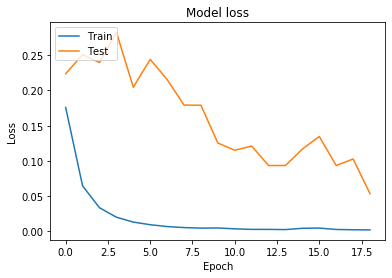

In [86]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [85]:
model.predict(X_test_scaled[:20])

array([[ 0.49588948],
       [ 1.613221  ],
       [ 0.63521117],
       [ 0.53890157],
       [-0.        ],
       [ 5.827584  ],
       [-0.        ],
       [ 4.483825  ],
       [ 0.2483202 ],
       [-0.        ],
       [ 0.4925291 ],
       [ 0.48650408],
       [ 1.2770282 ],
       [ 1.2401036 ],
       [-0.        ],
       [ 2.8785944 ],
       [ 0.5113108 ],
       [ 3.5574772 ],
       [-0.        ],
       [ 0.43606627]], dtype=float32)

In [77]:
y_test[:20]

array([0.69314718, 1.64791843, 0.82395922, 0.69314718, 0.        ,
       5.54517744, 0.        , 4.15888308, 0.46209812, 0.        ,
       0.69314718, 0.69314718, 1.38629436, 1.38629436, 0.        ,
       2.87823137, 0.69314718, 3.29583687, 0.        , 0.69314718])